In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\guill\AppData\Local\Temp\ipykernel_25924\3318745538.py:1: SyntaxWarning: invalid escape seq

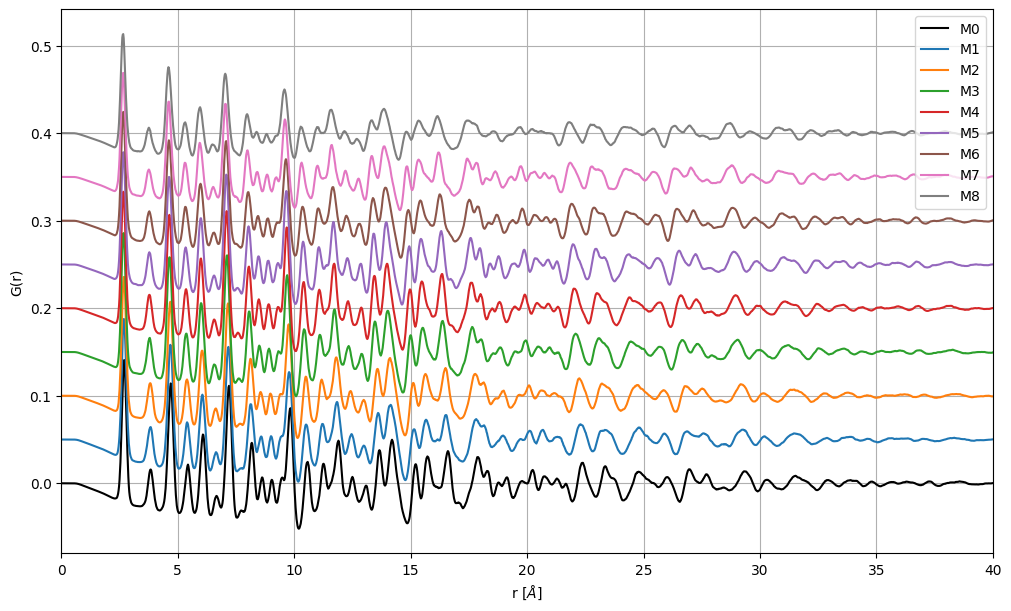

In [4]:
M0 = pd.read_csv('../../04_19_2024_radial_distributions/M0/M0-polrad_0_d2.txt', sep='\s+')
M1 = pd.read_csv('../../04_19_2024_radial_distributions/M1/M0-polrad_1_d2.txt', sep='\s+')
M2 = pd.read_csv('../../04_19_2024_radial_distributions/M2/M0-polrad_2_d2.txt', sep='\s+')
M3 = pd.read_csv('../../04_19_2024_radial_distributions/M3/M0-polrad_3_d2.txt', sep='\s+')
M4 = pd.read_csv('../../04_19_2024_radial_distributions/M4/M0-polrad_4_d2.txt', sep='\s+')
M5 = pd.read_csv('../../04_19_2024_radial_distributions/M5/M0-polrad_5_d2.txt', sep='\s+')
M6 = pd.read_csv('../../04_19_2024_radial_distributions/M6/M0-polrad_6_d2.txt', sep='\s+')
M7 = pd.read_csv('../../04_19_2024_radial_distributions/M7/M0-polrad_7_d2.txt', sep='\s+')
M8 = pd.read_csv('../../04_19_2024_radial_distributions/M8/M0-polrad_8_d2.txt', sep='\s+')

fig, ax = plt.subplots(figsize=(10,6), layout='constrained' )

x = 0.05

ax.plot(M0['#r(A)'],M0['G(r)']+0*x, color='black', label='M0')
ax.plot(M1['#r(A)'],M1['G(r)']+1*x, label='M1')
ax.plot(M2['#r(A)'],M2['G(r)']+2*x, label='M2')
ax.plot(M3['#r(A)'],M3['G(r)']+3*x, label='M3')
ax.plot(M4['#r(A)'],M4['G(r)']+4*x, label='M4')
ax.plot(M5['#r(A)'],M5['G(r)']+5*x, label='M5')
ax.plot(M6['#r(A)'],M6['G(r)']+6*x, label='M6')
ax.plot(M7['#r(A)'],M7['G(r)']+7*x, label='M7')
ax.plot(M8['#r(A)'],M8['G(r)']+8*x, label='M8')

ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,40])
ax.set_ylabel('G(r)')

ax.legend(loc='upper right')
ax.grid()
plt.rc('font', size='12')
plt.rcParams['font.family']='serif'
plt.show()

In [5]:
M = pd.DataFrame()

df_exp = pd.read_csv('../Post-PtPdCo-PDF.csv', sep = '\s+', header=None, names=['r','G(r)'])
df_exp = df_exp.replace('--',np.nan).dropna()
rest_df_exp = df_exp["G(r)"].iloc[1::2].astype(float)
rest_df_exp = rest_df_exp.reset_index(drop=True)
rest_df_exp.index += 1
M['exp'] = rest_df_exp

dx = 0.02

#M.index = M0['#r(A)']
M['M0'] = M0['G(r)']
M['M1'] = M1['G(r)']
M['M2'] = M2['G(r)']
M['M3'] = M3['G(r)']
M['M4'] = M4['G(r)']
M['M5'] = M5['G(r)']
M['M6'] = M6['G(r)']
M['M7'] = M7['G(r)']
M['M8'] = M8['G(r)']
M.index = (M.index + 1)*dx

for i in range(9):
    a = M[M[f'M{i}']== max(M[f'M{i}'])].index[0]
    b = 0.33 #### Al parecer este es el originario de todo lo que yo estaba haciendo
    c = b/(float(M[f'M{i}'][a]))
    M[f'M{i}'] *= c
    rest = M['exp'] - M[f'M{i}']
    error = np.sum(rest**2)
    error_p = np.sqrt(error)*100/50
    print(f'Para M{i} el error es {error},y el error porcentual es {error_p}')




fig = px.line(M, template='simple_white', title='Pair Distribution Functions of 9 Models',
    width=1000, height=600)
fig.update_layout(
    font_family="serif",
    title_font_family="serif")
fig.update_xaxes(title_text='G(r)')
fig.update_yaxes(title_text='r [A]')
fig.show()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\guill\AppData\Local\Temp\ipykernel_25924\1262413142.py:3: SyntaxWarning: invalid escape sequence '\s'
  df_exp = pd.read_csv('../Post-PtPdCo-PDF.csv', sep = '\s+', header=None, names=['r','G(r)'])


Para M0 el error es 0.8433227843206133,y el error porcentual es 1.8366521546777586
Para M1 el error es 0.7373759745478512,y el error porcentual es 1.7174119768393967
Para M2 el error es 0.9457788605520745,y el error porcentual es 1.945023249786053
Para M3 el error es 2.6422148302115698,y el error porcentual es 3.250978209838737
Para M4 el error es 3.476177975874604,y el error porcentual es 3.728902238393817
Para M5 el error es 3.843383167212024,y el error porcentual es 3.9209096736405566
Para M6 el error es 3.845346048666827,y el error porcentual es 3.921910783619039
Para M7 el error es 4.541047109314802,y el error porcentual es 4.26194655495106
Para M8 el error es 4.258919089638184,y el error porcentual es 4.127429752103933


El modelo M1 ajusta mejor

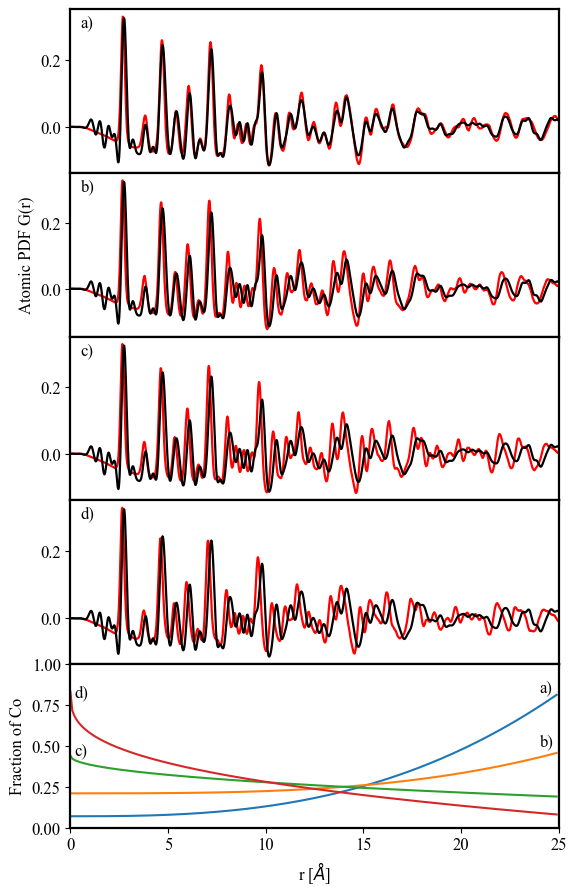

In [6]:
ancho_cm = 16
alto_cm = 27
ancho_pulg = ancho_cm / 2.54
alto_pulg = alto_cm / 2.54

fig, ax =plt.subplots(5,1, sharex=True, figsize=(ancho_pulg, alto_pulg))
fig.subplots_adjust(hspace=0)

j = 0
for i in [1,3,5,7]:
    ax[j].plot(M.index, M[f'M{i}'], label = f'{i}', color = 'red', lw=1.6)
    ax[j].plot(M.index, M['exp'], color = 'black', lw=1.6)
    ax[j].set_xlim([0,25])
    #ax[i].label_outer()
    for axis in ['top', 'bottom', 'left', 'right']:
        ax[j].spines[axis].set(linewidth = 1.6)
    j = j+1


a = [1,0.75,0.5,0.25,0.0,-0.25,-0.5,-0.75,-1]
b = [0,0.07,0.14,0.21,0.27001,0.44,0.64,0.83,1]

for i in [1,3,5,7]:
    aa = a[i]
    bb = b[i]
    x = np.arange(0,25,0.1)
    pol = aa*pow(x/25,aa/(0.27-bb)-1)+bb
    ax[4].plot(x,pol,label=f'M{i}')

for axis in ['top', 'bottom', 'left', 'right']:
        ax[4].spines[axis].set(linewidth = 1.6)

ax[4].set_ylim(0,1)
ax[4].set_ylabel('Fraction of Co')

ax[4].set_xlabel('r [$\\AA$]')
ax[1].set_ylabel('Atomic PDF G(r)')

ax[4].text(*[24,0.83], 'a)', rotation_mode='anchor')
ax[4].text(*[24,0.5], 'b)', rotation_mode='anchor')
ax[4].text(*[0.2,0.45], 'c)', rotation_mode='anchor')
ax[4].text(*[0.2,0.8], 'd)', rotation_mode='anchor')
    


ax[0].text(*[0.5,0.3], 'a)', rotation_mode='anchor')
ax[1].text(*[0.5,0.3], 'b)', rotation_mode='anchor')
ax[2].text(*[0.5,0.3], 'c)', rotation_mode='anchor')
ax[3].text(*[0.5,0.3], 'd)', rotation_mode='anchor')




plt.rc('font', size=12)

#fpath = Path(mpl.get_data_path(), "C:/Users/guill/Downloads/Fira_Sans/FiraSans-Medium.ttf")

plt.rcParams['font.serif'] = ['Times New Roman']
plt.show()

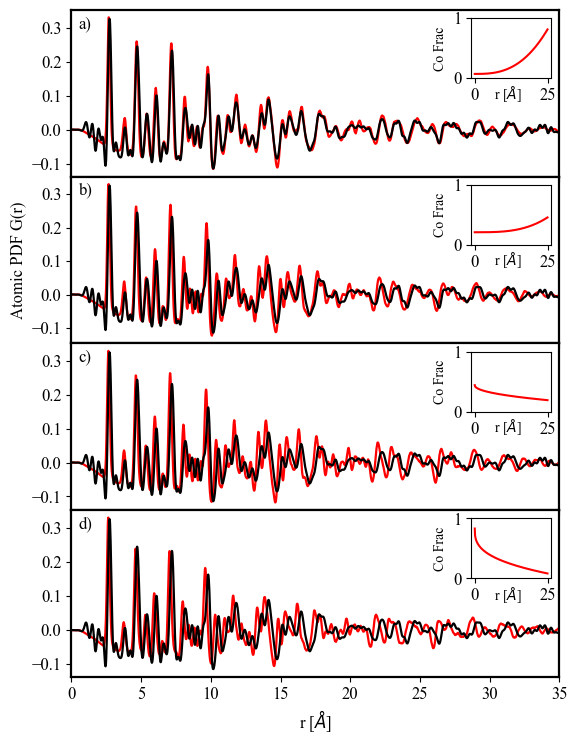

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ancho_cm = 16
alto_cm = 22
ancho_pulg = ancho_cm / 2.54
alto_pulg = alto_cm / 2.54

fig, ax =plt.subplots(4,1, sharex=True, figsize=(ancho_pulg, alto_pulg))
fig.subplots_adjust(hspace=0)

j = 0
for i in [1,3,5,7]:
    ax[j].plot(M.index, M[f'M{i}'], label = f'{i}', color = 'red', lw=1.6)
    ax[j].plot(M.index, M['exp'], color = 'black', lw=1.6)
    ax[j].set_xlim([0,35])
    #ax[i].label_outer()
    for axis in ['top', 'bottom', 'left', 'right']:
        ax[j].spines[axis].set(linewidth = 1.6)
    j = j+1

a = [1,0.75,0.5,0.25,0.0,-0.25,-0.5,-0.75,-1]
b = [0,0.07,0.14,0.21,0.27001,0.44,0.64,0.83,1]

axins0 = inset_axes(ax[0], width=0.8, height=0.6)
axins1 = inset_axes(ax[1], width=0.8, height=0.6)
axins2 = inset_axes(ax[2], width=0.8, height=0.6)
axins3 = inset_axes(ax[3], width=0.8, height=0.6)


x = np.arange(0,25,0.1)
for axis, i in [(axins0,1), (axins1,3), (axins2,5), (axins3,7)]:
    aa = a[i]
    bb = b[i]
    pol = aa*pow(x/25,aa/(0.27-bb)-1)+bb
    axis.plot(x,pol,label=f'M{i}', color = 'red')
    axis.set_ylim(0,1)
    #axis.set_xlabel('r')
    axis.set_ylabel('Co Frac', size = 10)

#for axis in ['top', 'bottom', 'left', 'right']:
        #ax.spines[axis].set(linewidth = 1.6)


ax[3].set_xlabel('r [$\\AA$]')
ax[1].set_ylabel('Atomic PDF G(r)')

ax[0].text(*[0.5,0.3], 'a)', rotation_mode='anchor')
ax[1].text(*[0.5,0.3], 'b)', rotation_mode='anchor')
ax[2].text(*[0.5,0.3], 'c)', rotation_mode='anchor')
ax[3].text(*[0.5,0.3], 'd)', rotation_mode='anchor')

for i in range(4):
    ax[i].text(*[30.3,0.09], 'r [$\\AA$]', size = 10)



plt.rc('font', size=12)

#fpath = Path(mpl.get_data_path(), "C:/Users/guill/Downloads/Fira_Sans/FiraSans-Medium.ttf")

plt.rcParams['font.serif'] = ['Times New Roman']
plt.show()

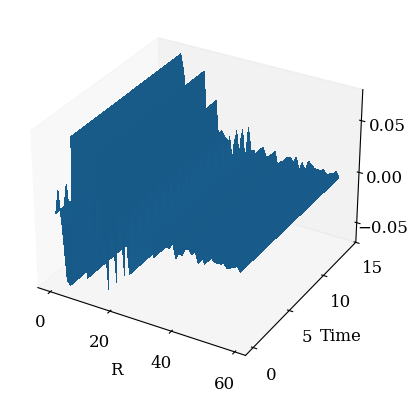

In [4]:
F = M.iloc[::50]
equis = np.arange(0,15)
z_array = F['exp'].to_numpy()
y_array = F.index.to_numpy()
equis, ye = np.meshgrid(y_array, equis)
zeta = np.empty(shape=(15,len(z_array)))
for i in range (15):
    zeta[i] = z_array

ax = plt.figure().add_subplot(projection='3d')
surf = ax.plot_surface(equis, ye, zeta, antialiased=False, lw=1.4)
#ax.set_facecolor('#D1C8B6')
#print(np.shape(equis), np.shape(ye), np.shape(zeta))

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set(linewidth = 1.4)

ax.set_xlabel('R')
ax.set_ylabel('Time')
ax.grid(False)

plt.rc('font', size=16)

plt.rcParams['font.family'] = 'sans-serif'
plt.show()

array([[-0.00982064, -0.0113957 , -0.01319036, ..., -0.01522953,
        -0.01319036, -0.0113957 ],
       [-0.0113957 , -0.01322338, -0.01530587, ..., -0.01767209,
        -0.01530587, -0.01322338],
       [-0.01319036, -0.01530587, -0.01771632, ..., -0.02045518,
        -0.01771632, -0.01530587],
       ...,
       [-0.01200234, -0.01414685, -0.01660867, ...,  0.02918791,
         0.03019517,  0.03085725],
       [-0.01097235, -0.01288301, -0.01507265, ...,  0.01583738,
         0.01709512,  0.01804782],
       [-0.00988645, -0.01157475, -0.01350698, ...,  0.00702321,
         0.0083816 ,  0.00947216]])

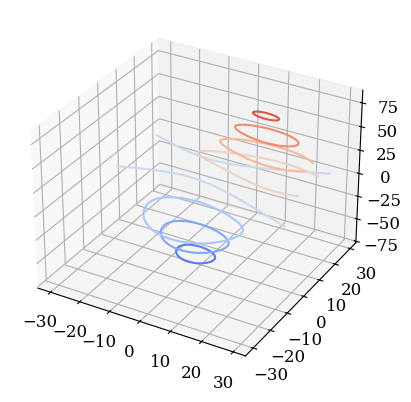

In [56]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

ax.contour(X, Y, Z, cmap=cm)  # Plot contour curves

#plt.show()
Z

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[y, x] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)